<a href="https://colab.research.google.com/github/dnhshl/cc-ai/blob/main/simpleRobot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Erstes Testnotebook


In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

# Daten

In [61]:
l1 = 1
l2 = 1


traindatasize = 200000
dout = np.random.random_sample((traindatasize,2))*360

din = np.array([l1 * np.cos(np.radians(dout[:,0])) + l2 * np.cos(np.radians(dout[:,1])), 
                l1 * np.sin(np.radians(dout[:,0])) + l2 * np.sin(np.radians(dout[:,1]))]) 


din = np.transpose(tin)


testdatasize = 2000
testout = np.random.random_sample((testdatasize,2))*360

testin = np.array([l1 * np.cos(np.radians(testout[:,0])) + l2 * np.cos(np.radians(testout[:,1])), 
                l1 * np.sin(np.radians(testout[:,0])) + l2 * np.sin(np.radians(testout[:,1]))]) 


testin = np.transpose(testin)



#print(tout)
#print(tin)



In [56]:
inputs = keras.Input(shape= (2))

from tensorflow.keras import layers

x = layers.Dense(200, activation='sigmoid')(inputs)

x = layers.Dense(200, activation='sigmoid')(x)

outputs = layers.Dense(2)(x)

model = keras.Model(inputs=inputs, outputs=outputs)

model.summary()



Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 2)]               0         
_________________________________________________________________
dense_22 (Dense)             (None, 200)               600       
_________________________________________________________________
dense_23 (Dense)             (None, 200)               40200     
_________________________________________________________________
dense_24 (Dense)             (None, 2)                 402       
Total params: 41,202
Trainable params: 41,202
Non-trainable params: 0
_________________________________________________________________


In [57]:

processed_data = model(tin[:10])
print(processed_data.shape)

(10, 2)


In [58]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [37]:
history = model.fit(tdata_input, tdata_output,
          batch_size=32, epochs=10)

Epoch 1/10
625/625 [==============================] - 1s 1ms/step - loss: 3.8060
Epoch 2/10
625/625 [==============================] - 1s 2ms/step - loss: 2.2899
Epoch 3/10
625/625 [==============================] - 1s 1ms/step - loss: 2.2456
Epoch 4/10
625/625 [==============================] - 1s 1ms/step - loss: 2.2054
Epoch 5/10
625/625 [==============================] - 1s 1ms/step - loss: 2.2310
Epoch 6/10
625/625 [==============================] - 1s 2ms/step - loss: 2.1762
Epoch 7/10
625/625 [==============================] - 1s 2ms/step - loss: 2.1783
Epoch 8/10
625/625 [==============================] - 1s 2ms/step - loss: 2.1498
Epoch 9/10
625/625 [==============================] - 1s 2ms/step - loss: 2.1255
Epoch 10/10
625/625 [==============================] - 1s 2ms/step - loss: 2.1019


In [38]:
vdatasize = 200
vdata_output = np.random.random_sample((vdatasize,2))

vdata_input = np.array([datapoint(d) for d in vdata_output])



In [39]:
model.evaluate(vdata_input,vdata_output,verbose=1)

7/7 [==============================] - 0s 2ms/step - loss: 1.2429


1.2428808212280273

In [40]:
predictions = model.predict(vdata_input)


for i in range(5):
  print(predictions[i], vdata_output[i])

[2.6576722 2.8358974] [0.08201006 0.09270152]
[0.5478339 0.665392 ] [0.88999259 0.7016841 ]
[1.3563654 1.4762149] [0.12649582 0.68528626]
[1.8427658 1.9866296] [0.47227339 0.06442855]
[0.5293668 0.6385452] [0.71822814 0.99853874]


In [62]:
def build_and_compile_model():
  model = keras.Sequential([
      layers.Dense(64, input_shape=[2,], activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(2)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model

In [63]:
newmodel = build_and_compile_model()
newmodel.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 64)                192       
_________________________________________________________________
dense_29 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_30 (Dense)             (None, 2)                 130       
Total params: 4,482
Trainable params: 4,482
Non-trainable params: 0
_________________________________________________________________


In [64]:
print(tin[:10])

newmodel.predict(tin[:10])


[[-0.86311831 -1.44983729]
 [ 1.28447688  1.24319462]
 [ 0.97776434 -1.41305957]
 [-0.32946144 -0.11565085]
 [-0.65113004 -0.3090084 ]
 [-0.5152523   0.43708811]
 [ 0.90156003  1.59631292]
 [-0.16054073  1.78489014]
 [ 0.30281571 -0.78323589]
 [ 0.03220676  0.51416658]]


array([[ 0.03437632,  0.0507341 ],
       [-0.34251016, -0.08337753],
       [ 0.02693238,  0.05308942],
       [-0.00286568,  0.0184084 ],
       [-0.00060647,  0.03231282],
       [-0.07102709, -0.00327792],
       [-0.4530377 , -0.09484571],
       [-0.46734783, -0.0288842 ],
       [ 0.01815152,  0.02662897],
       [-0.14434338, -0.01463851]], dtype=float32)

In [65]:
history = newmodel.fit(
    tin, tout, 
    epochs=10,
    # suppress logging
    verbose=1,
    # Calculate validation results on 20% of the training data
    validation_split = 0.2)

Epoch 1/10
5000/5000 [==============================] - 7s 1ms/step - loss: 80.8119 - val_loss: 61.0746
Epoch 2/10
5000/5000 [==============================] - 7s 1ms/step - loss: 60.6881 - val_loss: 60.6264
Epoch 3/10
5000/5000 [==============================] - 7s 1ms/step - loss: 60.2788 - val_loss: 60.3804
Epoch 4/10
5000/5000 [==============================] - 7s 1ms/step - loss: 60.2917 - val_loss: 60.3379
Epoch 5/10
5000/5000 [==============================] - 7s 1ms/step - loss: 60.1111 - val_loss: 60.2765
Epoch 6/10
5000/5000 [==============================] - 7s 1ms/step - loss: 60.0592 - val_loss: 60.2770
Epoch 7/10
5000/5000 [==============================] - 7s 1ms/step - loss: 60.0284 - val_loss: 60.2650
Epoch 8/10
5000/5000 [==============================] - 7s 1ms/step - loss: 60.2656 - val_loss: 60.2998
Epoch 9/10
5000/5000 [==============================] - 7s 1ms/step - loss: 60.1527 - val_loss: 60.2455
Epoch 10/10
5000/5000 [==============================] - 7s 1ms/

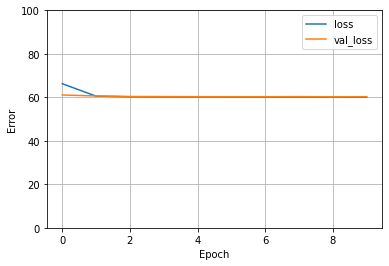

In [69]:
import matplotlib.pyplot as plt

def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 100])
  plt.xlabel('Epoch')
  plt.ylabel('Error')
  plt.legend()
  plt.grid(True)

plot_loss(history)